# **Project Title: Predicting Graduate Admission Chances Using Linear Regression**

## **Project Description :-**
### This project endeavors to predict the likelihood of a student's admission into a graduate program using Linear Regression. By analyzing key features such as GRE scores, TOEFL scores, GPA, and research experience, the model provides insights into the admissions process. The project encompasses data preprocessing, exploratory data analysis, model training, evaluation, and visualization, offering a holistic view of the predictive modeling pipeline.

### **Objective: Predict the probability of admission (Chance of Admit) based on applicant profiles.**

### **Step 1 : Import Libraries**
#### **pandas:** Used for data manipulation and analysis, offering powerful data structures like DataFrames to handle and process structured data efficiently.
#### **numpy:** Provides support for numerical operations on large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
#### **matplotlib.pyplot:** Used for cremating static, interactive, and animated visualizations in Python, enabling plotting of various graphs such as line charts, scatter plots, and histograms.
#### **seaborn:** A data visualization library built on matplotlib, providing a high-level interface to create statistical graphics such as heatmaps, pair plots, and box plots.

#### **sklearn.model_selection:**
#### **train_test_split:** Splits the dataset into training and testing sets, ensuring an appropriate balance for model training and validation.

#### **sklearn.preprocessing:**
#### **StandardScaler:** Standardizes features by removing the mean and scaling to unit variance, ensuring all features contribute equally to the model.
#### **OneHotEncoder:** Converts categorical variables into a binary matrix (dummy variables), enabling models to interpret non-numerical features.

#### **sklearn.linear_model:**
#### **LinearRegression:** Builds a linear model by fitting a straight line to the data, predicting the target variable based on input features.
#### **Ridge:** A variation of linear regression that introduces L2 regularization, which reduces model complexity by penalizing large coefficients.
#### **Lasso:** Applies L1 regularization to linear regression, effectively performing feature selection by shrinking less important feature coefficients to zero.

#### **sklearn.metrics:**
#### **mean_squared_error (MSE):** Measures the average squared difference between actual and predicted values, penalizing large errors.
#### **mean_absolute_error (MAE):** Computes the average absolute difference between actual and predicted values, giving equal weight to all errors.
#### **r2_score (R²):** Indicates how well the model fits the data, representing the proportion of variance explained by the model.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### **Step 2:-Load and Explore the Dataset**

In [24]:
# Load the dataset
df = pd.read_csv('Admission_Predict.csv')
df



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [26]:
# Display the first few rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [30]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### **Step 3:-Exploratory Data Analysis (EDA)**

In [35]:
## Check for Missing Values
df.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

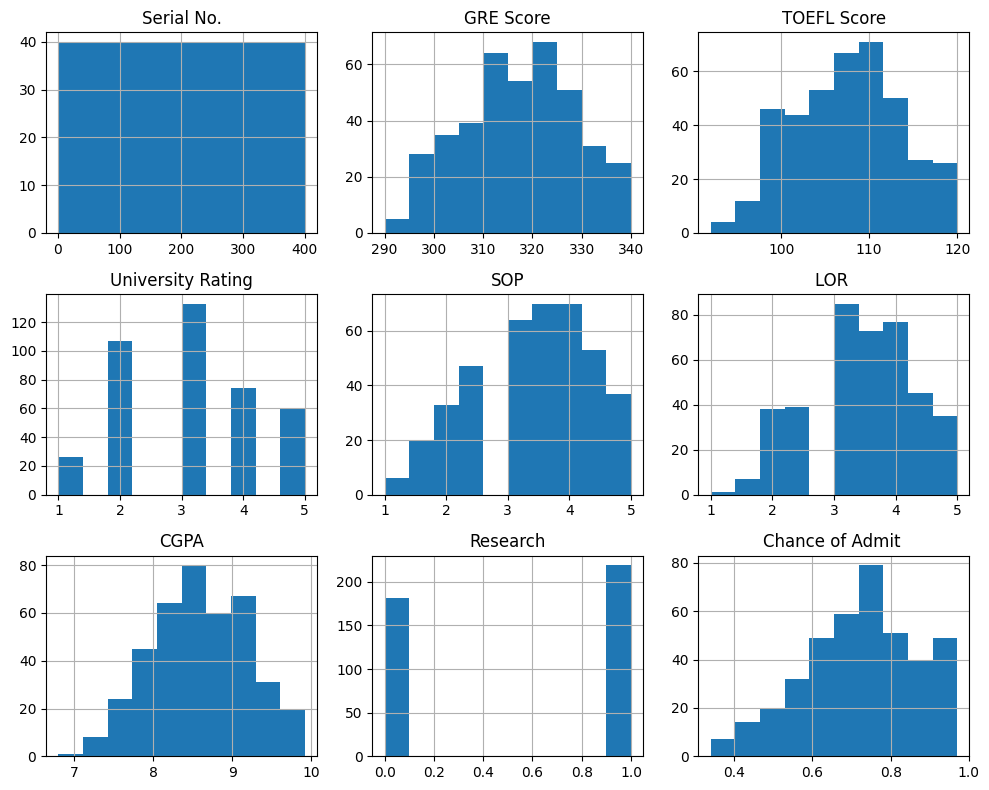

In [37]:
## Visualize Distributions
# Histograms for all features
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()


In [42]:
## Correlation Matrix
# Compute correlation matrix
corr_matrix = df.corr()




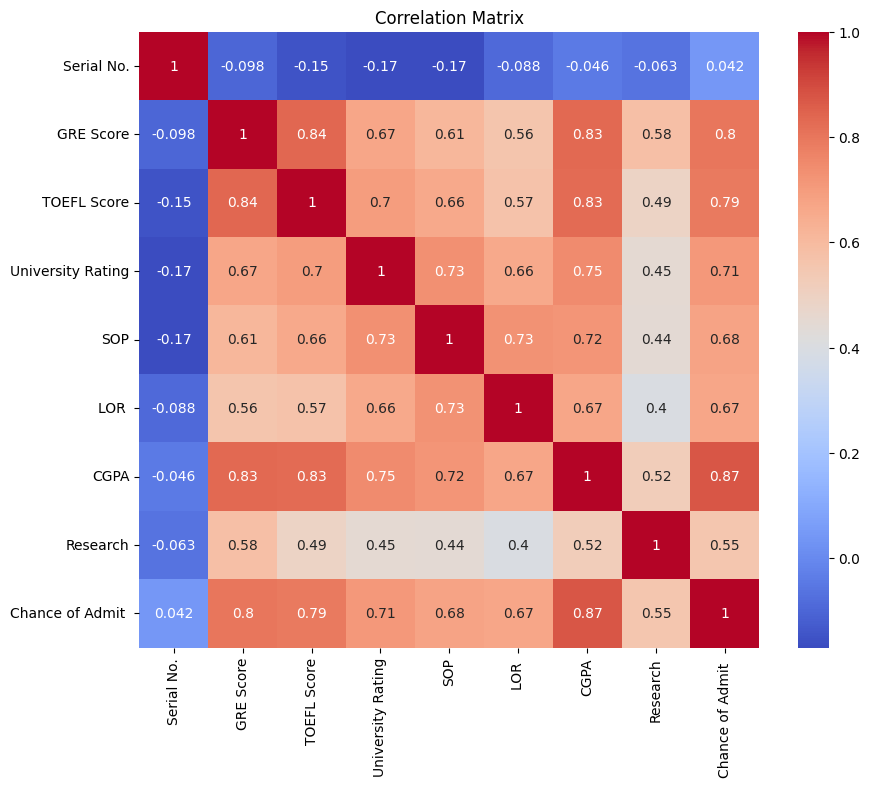

In [44]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### **Step 4:- Data Preprocessing**

In [51]:
## Drop Unnecessary Columns
## Drop 'Serial No.' 
df.drop(['Serial No.'], axis=1, inplace=True)


In [53]:
## Feature and Target Separation
## Features and target variable
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']


In [55]:
## Train-Test Split
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Step 5:- Model Building and Training**

In [58]:
# Initialize the model
model = LinearRegression()


In [60]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

### **Step 6:- Model Evaluation**

In [65]:
## Predictions
# Predict on test set
y_pred = model.predict(X_test)


In [67]:
##  Evaluation Metrics
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# R-squared Score
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 0.004617003377285012
R-squared Score: 0.8212082591486991


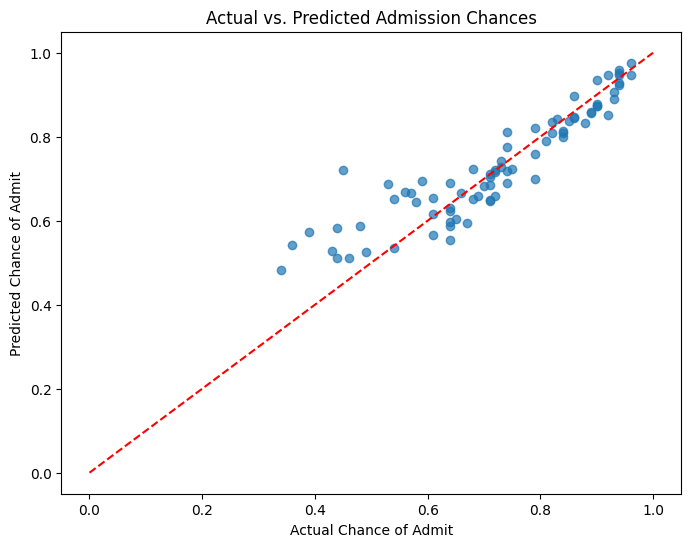

In [69]:
## Actual vs. Predicted Plot
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs. Predicted Admission Chances')
plt.plot([0,1],[0,1],'r--')  # Diagonal line
plt.show()



### **Conclusion**:-
### **The Linear Regression model demonstrates a strong ability to predict graduate admission chances, as evidenced by a high R-squared score and low mean squared error.Key predictors include GRE scores, TOEFL scores, GPA, and research experience. This model can serve as a valuable tool for prospective students to assess their admission probabilities.**